<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Electricidad y Magnetismo</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px; font-weight: bold">
        Visualización de campos eléctricos: Ley de Gauss
    </p>
</div>

### **Campo Eléctrico alrededor de un cascarón esférico**

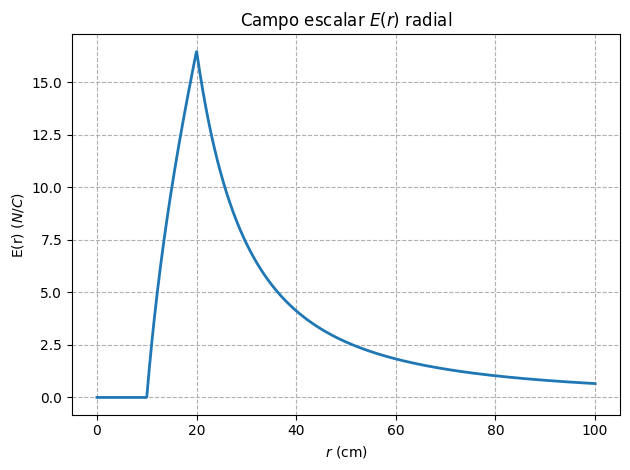

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
a = 0.1  # m (radio interno del cascarón)
rho = 2.5e-9  # C/m^3 (densidad de carga volumétrica)
epsilon_0 = 8.85e-12  # permitividad del vacío

# Función E vectorizada
def E(r):
    E_out = np.zeros_like(r)
    mask1 = (r >= a) & (r < 2 * a)
    mask2 = (r >= 2 * a)
    E_out[mask1] = rho * (r[mask1]**3 - a**3) / (3 * epsilon_0 * r[mask1]**2)
    E_out[mask2] = 7 * rho * a**3 / (3 * epsilon_0 * r[mask2]**2)
    return E_out

# --------- Gráfico 1D: E vs r ---------
r_vals = np.linspace(0, 1, 1000)
E_vals = np.array([E(r) for r in r_vals], dtype=float)

plt.figure()
plt.plot(r_vals * 100, E_vals, lw=2)
plt.xlabel(r"$r$ (cm)")
plt.ylabel(r"E(r) $(N/C)$")
plt.title(r"Campo escalar $E(r)$ radial")
plt.grid(ls="--")
plt.tight_layout()
plt.show()

#### **Representación 2D**

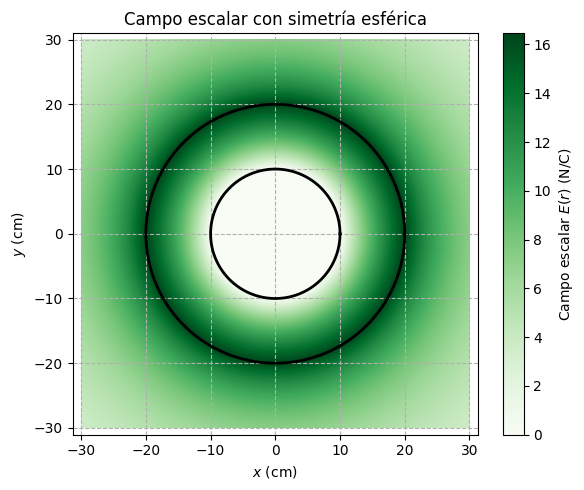

In [22]:
# Grilla cartesiana
L = 0.3  # Extensión en x e y
N = 500
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Evaluar el campo
E_grid = E(R)

# Graficar con imshow
plt.figure(figsize=(6, 5))
im = plt.imshow(E_grid, extent=[x[0] * 100, x[-1] * 100, y[0] * 100, y[-1] * 100], origin='lower', cmap='Greens', interpolation="spline16")

plt.colorbar(im, label=r"Campo escalar $E(r)$ (N/C)")
plt.xlabel(r"$x$ (cm)")
plt.ylabel(r"$y$ (cm)")
plt.title("Campo escalar con simetría esférica")

# Círculos de radio a y 2a
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(100 * a * np.cos(theta), 100 * a * np.sin(theta), color="k", linewidth=2)
plt.plot(100 * 2 * a * np.cos(theta), 100 * 2 * a * np.sin(theta), color="k", linewidth=2)

plt.axis("equal")
plt.grid(ls="--")
plt.tight_layout()
plt.show()

#### **Representación 2D del campo vectorial**

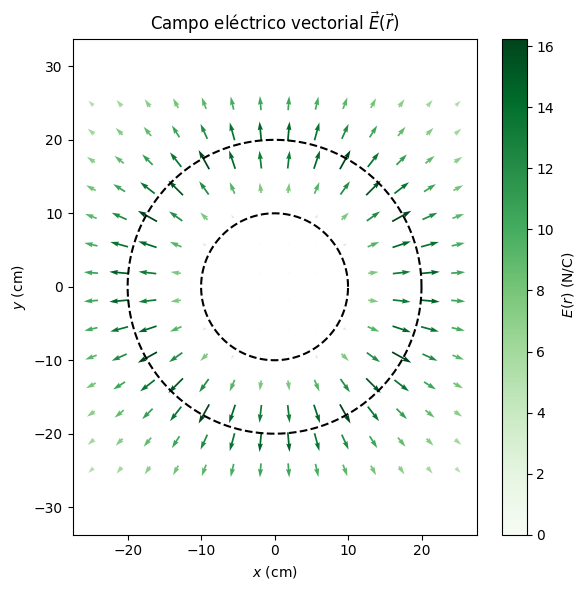

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
a = 0.1  # m
rho = 2.5e-9  # C/m^3
epsilon_0 = 8.85e-12  # C^2/(N·m^2)

# Campo escalar E(r) vectorizado
def E(r):
    E_out = np.zeros_like(r)
    mask1 = (r >= a) & (r < 2 * a)
    mask2 = (r >= 2 * a)
    E_out[mask1] = rho * (r[mask1]**3 - a**3) / (3 * epsilon_0 * r[mask1]**2)
    E_out[mask2] = 7 * rho * a**3 / (3 * epsilon_0 * r[mask2]**2)
    return E_out

# Grilla cartesiana
L = 0.25
N = 14  # Número reducido para que las flechas no se sobrecarguen
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Evaluar E(r)
E_mag = E(R)

# Evitar división por cero en el origen
with np.errstate(divide='ignore', invalid='ignore'):
    Ex = E_mag * X / R
    Ey = E_mag * Y / R
    Ex[R == 0] = 0
    Ey[R == 0] = 0

# Graficar campo vectorial con quiver
plt.figure(figsize=(6, 6))
plt.quiver(X*100, Y*100, Ex, Ey, E_mag, cmap='Greens', scale=3e2, pivot='middle')
plt.xlabel(r"$x$ (cm)")
plt.ylabel(r"$y$ (cm)")
plt.title("Campo eléctrico vectorial $\\vec{E}(\\vec{r})$")
plt.colorbar(label=" $E(r)$ (N/C)")

# Círculos indicativos
theta = np.linspace(0, 2 * np.pi, 500)
plt.plot(100*a * np.cos(theta), 100*a * np.sin(theta), 'k--')
plt.plot(100*2 * a * np.cos(theta), 100*2 * a * np.sin(theta), 'k--')

plt.axis("equal")
plt.tight_layout()
plt.show()


### **¿Y si la densidad de carga $\rho$ no es uniforme?**

Suponga que $\rho(r)$ representa una distribución de cargas con un mayor acúmulo cerca de la superficie externa del cascarón (es decir, cerca de $r=2a$) y menos en la interna (cerca de $r=a$). Podemos usar una función que crezca con $r$ dentro del cascarón esférico, como la siguiente:

$$ \rho(r) = \rho_0 \left( \frac{r - a}{r} \right)^n;~~ \text{para } a \leq r \leq 2a $$

- $\rho_0$ es una constante de normalización (puede ser negativa o positiva).
- $n \geq 1$ controla cuán rápido crece la densidad hacia la superficie externa.

Esta función es cero en $r=a$ y máxima en $r=2a$, contínua y suave.

**Ejemplo:**

$$ \rho(r) = 7 \rho_0 \left( \frac{r - a}{r} \right)^2;~~ \text{para } a \leq r \leq 2a $$

#### **Implementación**

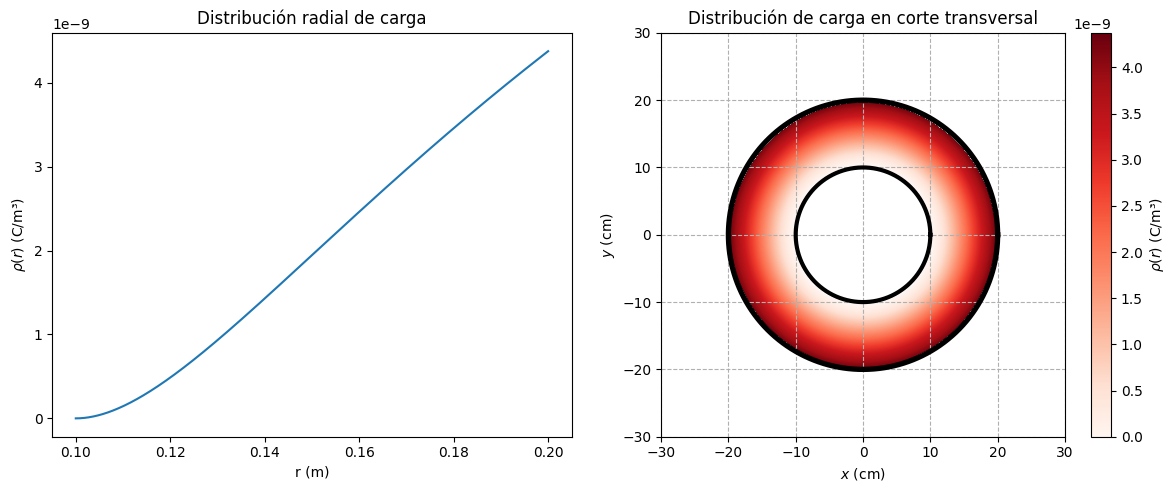

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Parámetros
a = 0.1
rho0 = 2.5e-9

# Nueva definición de la densidad de carga
def rho_r(r, rho0=2.5e-9, a=0.1):
    rho_out = np.zeros_like(r)
    mask = (r >= a) & (r <= 2 * a)
    rho_out[mask] = 7 * rho0 * ((r[mask] - a) / r[mask])**2
    return rho_out

# Grilla cartesiana
L = 0.3  # Extensión en x e y (m)
N = 2000
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Evaluar la densidad de carga en la grilla
rho_grid = rho_r(R)

# Enmascarar la región fuera de la esfera hueca
mask = (R < a) | (R > 2*a)
rho_masked = np.ma.array(rho_grid, mask=mask)

# Configurar colormap para que los valores enmascarados sean blancos
cmap = cm.get_cmap('Reds').copy()
cmap.set_bad(color='white')

# Crear figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Subplot 1: Distribución radial ---
r = np.linspace(a, 2*a, 1000)
axs[0].plot(r, rho_r(r))
axs[0].set_xlabel("r (m)")
axs[0].set_ylabel(r"$\rho(r)$ (C/m³)")
axs[0].set_title("Distribución radial de carga")

# --- Subplot 2: Colormap (corte transversal) ---
im = axs[1].imshow(rho_masked,
                   extent=[x[0]*100, x[-1]*100, y[0]*100, y[-1]*100],
                   origin='lower', cmap=cmap, interpolation="spline16")
axs[1].set_xlabel(r"$x$ (cm)")
axs[1].set_ylabel(r"$y$ (cm)")
axs[1].set_title("Distribución de carga en corte transversal")

# Dibujar los radios a y 2a
theta = np.linspace(0, 2*np.pi, 1000)
axs[1].plot(100*a*np.cos(theta), 100*a*np.sin(theta), color="k", linewidth=3)
axs[1].plot(100*2*a*np.cos(theta), 100*2*a*np.sin(theta), color="k", linewidth=3.8)

# Barra de color
fig.colorbar(im, ax=axs[1], label=r"$\rho(r)$ (C/m³)")

axs[1].set_aspect("equal")
axs[1].grid(ls="--")
plt.tight_layout()
plt.show()


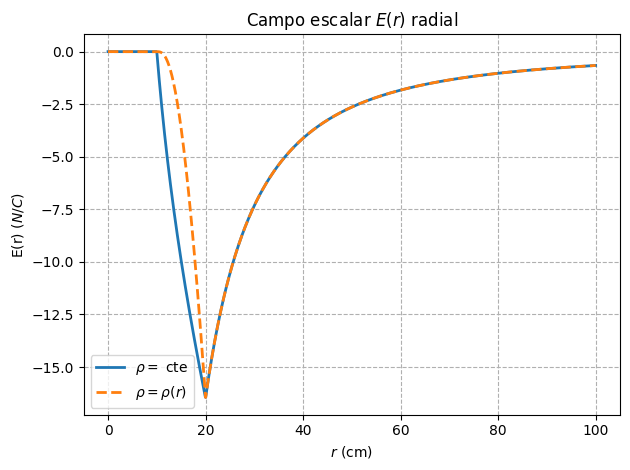

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
a = 0.1  # m (radio interno del cascarón)
rho = -2.5e-9  # C/m^3 (densidad de carga volumétrica)
epsilon_0 = 8.85e-12  # permitividad del vacío

# Función E vectorizada
def E_rho_non_uniform(r):
    E_out = np.zeros_like(r)
    mask1 = (r >= a) & (r < 2 * a)
    mask2 = (r >= 2 * a)
    E_out[mask1] = 7/4 * 4 * rho * (r[mask1] - a)**3 / (3 * epsilon_0 * r[mask1]**2)
    E_out[mask2] = 7/4 * 4 * rho * a**3 / (3 * epsilon_0 * r[mask2]**2)
    return E_out

# --------- Gráfico 1D: E vs r ---------
r_vals = np.linspace(0, 1, 1000)
E_vals = np.array([E(r) for r in r_vals], dtype=float)
E_nu_vals = np.array([E_rho_non_uniform(r) for r in r_vals], dtype=float)

plt.figure()
plt.plot(r_vals * 100, E_vals, lw=2, label="$\\rho =$ cte")
plt.plot(r_vals * 100, E_nu_vals, lw=2, label="$\\rho = \\rho(r)$", ls="--")
plt.xlabel(r"$r$ (cm)")
plt.ylabel(r"E(r) $(N/C)$")
plt.title(r"Campo escalar $E(r)$ radial")
plt.grid(ls="--")
plt.legend()
plt.tight_layout()
plt.show()

### **Cilindro hueco con densidad de carga no uniforme**

Un cilindro hueco largo, tiene radio interior a y radio exterior b:

<p align="center">
  <img src="cilindro_hueco.png" style="max-width: 90%; height: auto;">
</p>

Este cilindro tiene una densidad de carga por unidad de volumen dada por `𝜌=𝑘𝑟` , donde $k$ es una constante y $r$ es la distancia al eje. Calcule el potencial eléctrico en las regiones:

- $r<a$
- $a<r<b$
- $r>b$

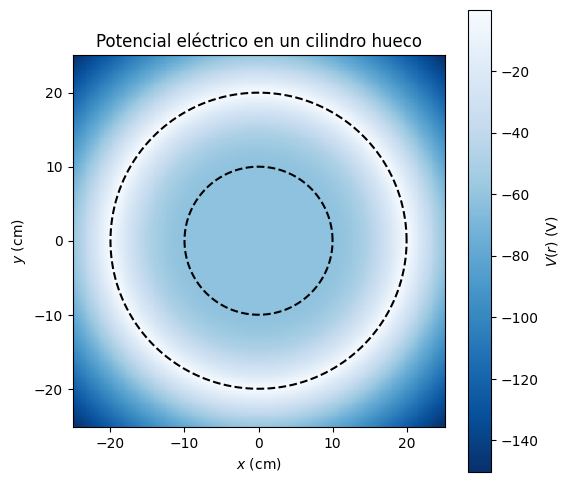

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros físicos ---
a = 0.1   # radio interior (m)
b = 0.2   # radio exterior (m)
k = 1e-6  # constante de densidad (C/m^4)
eps0 = 8.85e-12  # permitividad del vacío (C^2/(N·m^2))

# --- Definición de potencial eléctrico ---
def V_out(r):
    """Potencial para r > b (referencia V(b)=0)."""
    Q_total = k/(3*eps0) * (b**3 - a**3)
    return -Q_total * np.log(r/b)

def V_in(r):
    """Potencial para a < r < b."""
    coeff = k/(3*eps0)
    term = (r**3 - b**3)/3 - a**3 * np.log(r/b)
    return coeff * term

# --- Grilla cartesiana ---
L = 0.25  # extensión de la grilla (m)
N = 200   # resolución de la malla
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# --- Construcción del mapa de potencial ---
V = np.zeros_like(R)
for i in range(N):
    for j in range(N):
        r = R[i, j]
        if r < a:
            V[i, j] = V_in(a)  # constante interior
        elif a <= r <= b:
            V[i, j] = V_in(r)
        else:
            V[i, j] = V_out(r)

# --- Visualización ---
fig, ax = plt.subplots(figsize=(6, 6))

# Convertimos a cm para la visualización
X_cm, Y_cm = X*100, Y*100

# Mapa de color del potencial
c = ax.pcolormesh(X_cm, Y_cm, V, shading='auto', cmap='Blues_r')

# Barra de color alineada
cb = fig.colorbar(c, ax=ax, orientation='vertical')
cb.set_label(r"$V(r)$ (V)")

# Círculos que indican a y b
theta = np.linspace(0, 2*np.pi, 500)
ax.plot(100*a*np.cos(theta), 100*a*np.sin(theta), 'k--')
ax.plot(100*b*np.cos(theta), 100*b*np.sin(theta), 'k--')

# Ajustes finales
ax.set_xlabel(r"$x$ (cm)")
ax.set_ylabel(r"$y$ (cm)")
ax.set_aspect('equal')
ax.set_title("Potencial eléctrico en un cilindro hueco")

#lt.tight_layout()
plt.show()


<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Teórica y Física Computacional<br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>